<a href="https://colab.research.google.com/github/Imokut/my-tensorflow-learning/blob/main/Computer_vision_2_with_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Recap of the last code

In [5]:
import tensorflow as tf

#Load the fashion mnist dataset
fmnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = fmnist.load_data()

#Normalize the pixel values
training_images = training_images / 255
test_images = test_images / 255

#Build the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation = tf.nn.relu), 
    tf.keras.layers.Dense(10, activation = tf.nn.softmax)
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit( training_images, training_labels, epochs = 5)
model.evaluate(test_images, test_labels)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4978 - accuracy: 0.8243
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3749 - accuracy: 0.8632
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3371 - accuracy: 0.8769
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3141 - accuracy: 0.8845
Epoch 5/5
313/313 [==============================] - 1s 3ms/step - loss: 0.3452 - accuracy: 0.8774


[0.345248281955719, 0.8773999810218811]

#Convolution Neural Networks

In [ ]:
#define model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1)), 
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'), 
    tf.keras.layers.Dense(128, activation='relu'), 
    tf.keras.layers.Dense(10, activation = 'softmax')
])
display(model.summary())
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

print(f'\nMODEL TRAINING: ')
stopLoss = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
model.fit(training_images, training_labels, epochs=1000, callbacks=[stopLoss])

print(f'\nModel Evaluatin: ')
test_loss = model.evaluate(test_images, test_labels)
print(f'{test_loss}')

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 13, 13, 64)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 11, 11, 128)       73856     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 5, 5, 128)        0         
 2D)                                                             
                                                                 
 flatten_5 (Flatten)         (None, 3200)              0         
                                                                 
 dense_10 (Dense)            (None, 512)              

None


MODEL TRAINING: 
Epoch 1/1000
1875/1875 [==============================] - 171s 91ms/step - loss: 0.4123 - accuracy: 0.8479
Epoch 2/1000
1875/1875 [==============================] - 165s 88ms/step - loss: 0.2716 - accuracy: 0.8987
Epoch 3/1000
1875/1875 [==============================] - 168s 89ms/step - loss: 0.2220 - accuracy: 0.9165
Epoch 4/1000
1875/1875 [==============================] - 168s 90ms/step - loss: 0.1923 - accuracy: 0.9270
Epoch 5/1000
1875/1875 [==============================] - 166s 89ms/step - loss: 0.1589 - accuracy: 0.9397
Epoch 6/1000
1875/1875 [==============================] - 167s 89ms/step - loss: 0.1346 - accuracy: 0.9481
Epoch 7/1000
1875/1875 [==============================] - 166s 89ms/step - loss: 0.1161 - accuracy: 0.9554
Epoch 8/1000
1875/1875 [==============================] - 166s 89ms/step - loss: 0.0965 - accuracy: 0.9633
Epoch 9/1000
1875/1875 [==============================] - 168s 90ms/step - loss: 0.0824 - accuracy: 0.9686
Epoch 10/1000
1875/

#Visualing the convolutions and pooling

AttributeError: ignored

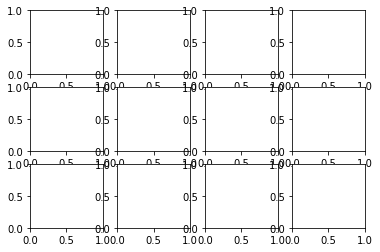

In [22]:
import matplotlib.pyplot as plt
from tensorflow.keras import models

fig, ax=plt.subplots(3, 4)
first_img = 0 
second_img = 23 
third_img = 28 
conv_num = 1 
layer_outputs = [layer.output for layer in models.layers]
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)

for x in range(0, 4):
  fig1 = activation_model.predict(test_images[first_img].reshape(1, 28, 28, 1))[x]
  ax[0, x].imshow(fig1[0, :, :, conv_num], cmap = 'inferno')
  ax[0, x].grid(False)

  fig2 = activation_model.predict(test_images[second_img].reshape(1, 28, 28, 1))[x]
  ax[1, x].imshow(fig1[0, :, :, conv_num], cmap = 'inferno')
  ax[1, x].grid(False)

  fig3 = activation_model.predict(test_images[third_img].reshape(1, 28, 28, 1))[x]
  ax[2, x].imshow(fig1[0, :, :, conv_num], cmap = 'inferno')
  ax[2, x].grid(False)